# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


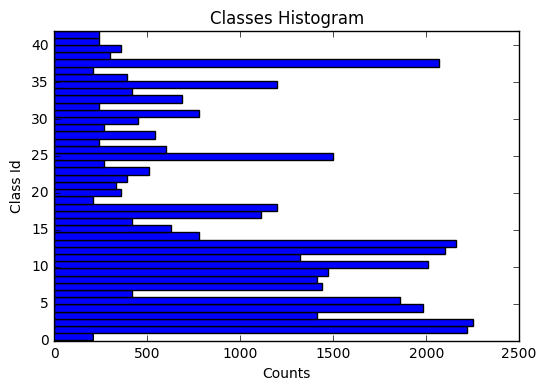

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
unique, counts = np.unique(y_train, return_counts=True)
n_classes = len(unique)

# For generating balanced jitter images later
freq_classes = dict(zip(unique, counts))
max_freq = np.max(counts)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# plotting the count of each label in the train set.
plt.figure()
plt.title("Classes Histogram")
plt.hist(y_train, n_classes,orientation="horizontal")
plt.ylim(0, n_classes-1)
plt.xlabel("Counts")
plt.ylabel("Class Id")
plt.show()

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import pandas
import random

signnames = pandas.read_csv('signnames.csv').values[:,1]

# pick one random image for each label
def random_pick(images, labels):
    samples = {}
    while True:
        index = random.randint(0, len(images))
        label = labels[index]
        if label not in samples:
            samples[label] = index
            if len(samples) == n_classes:
                break
    return samples

def plotsamples(images, samples):
    for sign_id, index in samples.items():
        fig = plt.figure(figsize=(1,1))
        plt.title('{}:{}'.format(sign_id,signnames[sign_id]),loc='left',fontsize=10)
        image = X_train[index].squeeze()
        plt.imshow(image)
        
train_samples = random_pick(X_train, y_train)
#plotsamples(X_train, train_samples)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

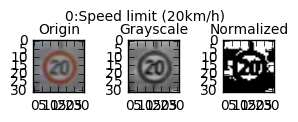

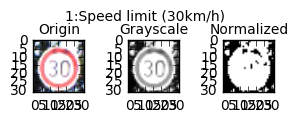

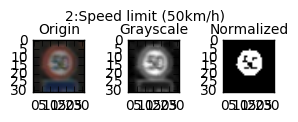

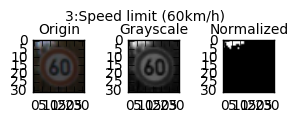

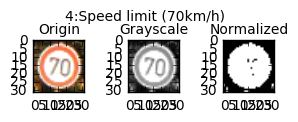

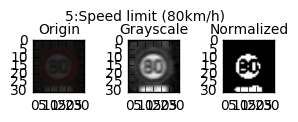

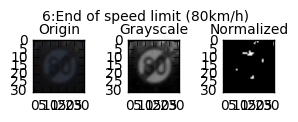

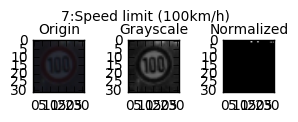

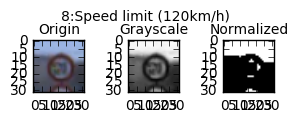

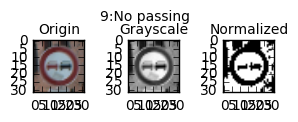

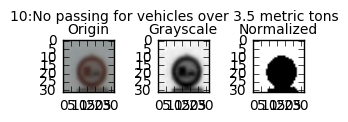

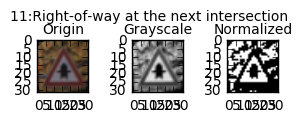

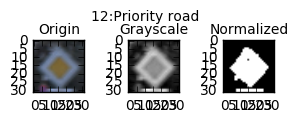

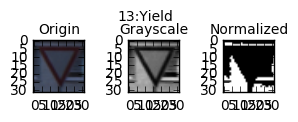

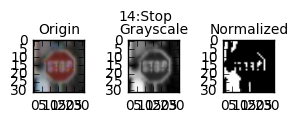

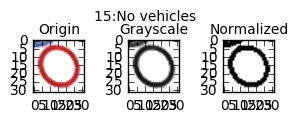

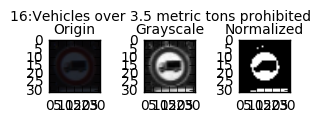

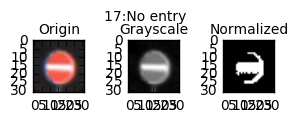

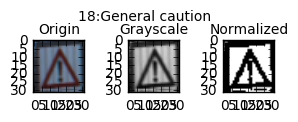

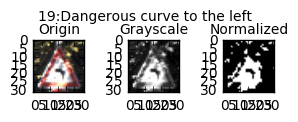

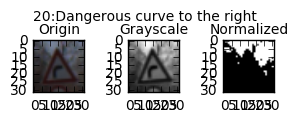

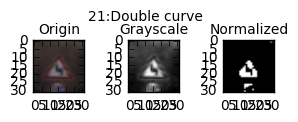

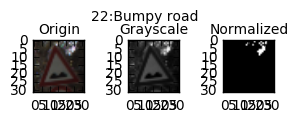

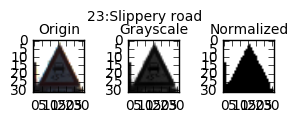

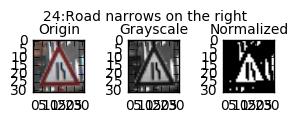

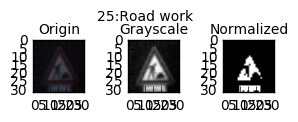

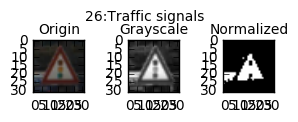

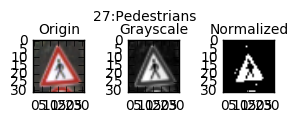

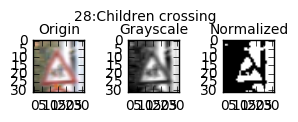

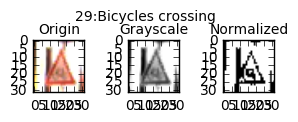

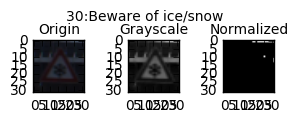

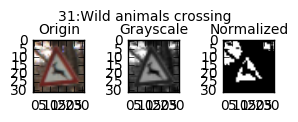

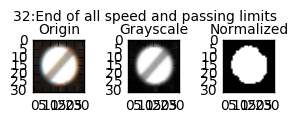

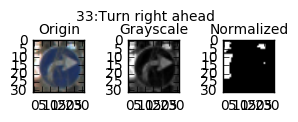

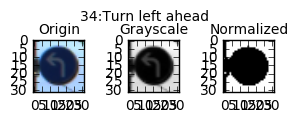

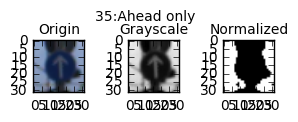

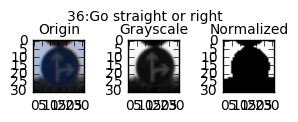

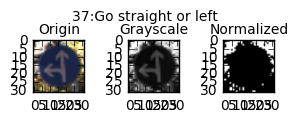

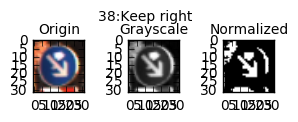

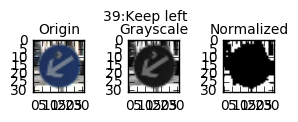

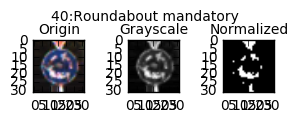

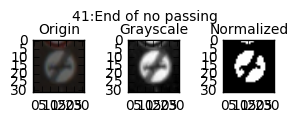

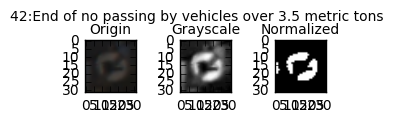

In [5]:
import cv2

def grayscale(img):
    return cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2GRAY)

def normalize(img):
    normalizedImg = np.zeros(shape=img.shape)
    normalizedImg = cv2.normalize(img.astype(np.uint8), normalizedImg, 0, 1, cv2.NORM_MINMAX)    
    return normalizedImg

X_train_gray = np.zeros([X_train.shape[0], X_train.shape[1], X_train.shape[2], 1])
for i, image in enumerate(X_train):
    X_train_gray[i] = grayscale(image)[...,None] # convert image shape from (32,32) to (32,32,1) for later

# use y_train_gray in later cells so that I can run the later cells repeatedly 
y_train_gray = np.copy(y_train)
    
X_train_norm = np.zeros([X_train.shape[0], X_train.shape[1], X_train.shape[2], 1])
for i, image in enumerate(X_train_gray):
    X_train_norm[i] = normalize(image)[...,None] # convert image shape from (32,32) to (32,32,1) for later

for sign_id, index in train_samples.items():
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(3, 1.2))
    fig.suptitle('{}:{}'.format(sign_id, signnames[sign_id]))
    ax1.set_title('Origin',fontsize=10)
    im1 = ax1.imshow(X_train[index].squeeze(), aspect='auto')
    ax2.set_title('Grayscale',fontsize=10)
    im2 = ax2.imshow(X_train_gray[index].squeeze(), aspect='auto', cmap='gray')
    ax3.set_title('Normalized',fontsize=10)
    im3 = ax3.imshow(X_train_norm[index].squeeze(), aspect='auto', cmap='gray')
    plt.tight_layout()
    plt.show()


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** Grayscaling increased accuracy dramatically. It reduced the channels from 3 to 1 so that it saved computation too. On the contrary, normarlization didn't bring performance gain as expected, instead, it lowered the accurary a lot. Tried putting normalization before grayscale or normalization-only, but the results were not good. 

Generating jitter images...


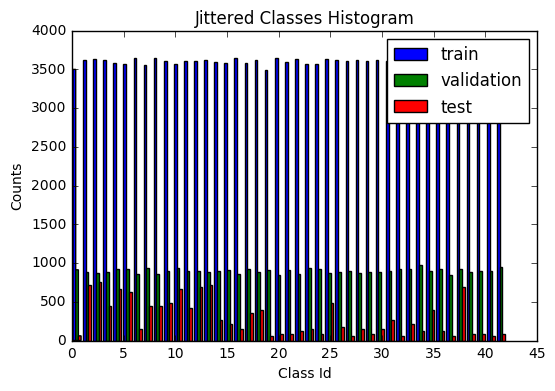

In [6]:
### Generate data additional data (OPTIONAL!)
### from https://carnd-forums.udacity.com/questions/10322627/project-2-unbalanced-data-generating-additional-data-by-jittering-the-original-image
def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation
    figure_index=3
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows = img.shape[0]
    cols = img.shape[1]
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    new_img = cv2.warpAffine(img,Rot_M,(cols,rows))
    new_img = cv2.warpAffine(img,Trans_M,(cols,rows))
    new_img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return new_img

### Generate jittered images
import random
def jitter(x, y):
    new_x = []
    new_y = []
    new_freq_classes = freq_classes.copy()
    for i, image in enumerate(x):
        label = y[i]
        new_x.append(image)
        new_y.append(label)
        for j in range(20): # one image maximally generates 30 jitters
            if new_freq_classes[label] < max_freq*2: # cap to the double of the origin max frequency
                jitter_image = transform_image(image,20,10,5)
                new_x.append(jitter_image[...,None])
                new_y.append(label)
                new_freq_classes[label] += 1
    return np.array(new_x), np.array(new_y)

### and split the data into training/validation/testing sets here.
from sklearn.model_selection import train_test_split

# Use grayscaled images and labels to generate jitter images 
print("Generating jitter images...")
X_train_jitter, y_train_jitter = jitter(X_train_gray, y_train_gray)

# Jittered images didn't increase accuracy, but learning curve seems smoother than non-jitter
X_train, X_validation, y_train, y_validation = train_test_split(
     X_train_jitter, y_train_jitter, test_size=0.2, random_state=0)

# Plot the count of each label in the jittered train set.
plt.figure()
plt.title("Jittered Classes Histogram")
plt.ylabel("Counts")
plt.xlabel("Class Id")
plt.hist([y_train, y_validation, y_test], 43, label=['train', 'validation', 'test'])
plt.legend(loc='upper right')

# Uncomment below if don't want to use jittered data
#X_train, X_validation, y_train, y_validation = train_test_split(
#     X_train_gray, y_train_gray, test_size=0.2, random_state=0)




### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I split the train data into 80% train set and 20% validation set. Validation set is used to tune model and hyperparameters. Test data remains unchanged. I followed the forum discussion to generate jitter images, to keep the frequencies of classes(labels) balanced. But it didn't increase accuracy much.

In [7]:
# reuse the LeNet but change depths and number of labels accordingly
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** I reused the deep neural network - LeNet solution as suggested.  It consists of 2 convolutional layers, each layer uses a 5x5 filter, relu activation and max pooling with 2 strides.  After a flatten layter, there are 3 full connection layers to get final output - 43 classes.  The depth of final layer was just changed from 10 to 43 to adapt the change on the number of classes. I tried to increase the layer depths, but it took longer training time and didn't gain performance/accuracy improvement. As I saw the model trained by non-jittered data seems is a bit overfitting, I added a dropout layer per activation, but it turned out was not helpful (the keep_prod was tuned to 1 eventually). Not sure if adding extra conve layers or full connectied layers will help performance, so I didn't really try. The other two hyperparameters: mu and sigma seem are the good ones. 

In [8]:
# Hyperparameters
rate = 0.001
EPOCHS = 15
BATCH_SIZE = 128

# Optimizer
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(sess, X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Train the Model
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        train_accuracy = evaluate(sess, X_train, y_train)
        validation_accuracy = evaluate(sess, X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.770
Validation Accuracy = 0.755

EPOCH 2 ...
Train Accuracy = 0.861
Validation Accuracy = 0.845

EPOCH 3 ...
Train Accuracy = 0.919
Validation Accuracy = 0.902

EPOCH 4 ...
Train Accuracy = 0.949
Validation Accuracy = 0.930

EPOCH 5 ...
Train Accuracy = 0.941
Validation Accuracy = 0.920

EPOCH 6 ...
Train Accuracy = 0.958
Validation Accuracy = 0.940

EPOCH 7 ...
Train Accuracy = 0.965
Validation Accuracy = 0.945

EPOCH 8 ...
Train Accuracy = 0.969
Validation Accuracy = 0.948

EPOCH 9 ...
Train Accuracy = 0.969
Validation Accuracy = 0.948

EPOCH 10 ...
Train Accuracy = 0.971
Validation Accuracy = 0.951

EPOCH 11 ...
Train Accuracy = 0.977
Validation Accuracy = 0.956

EPOCH 12 ...
Train Accuracy = 0.961
Validation Accuracy = 0.939

EPOCH 13 ...
Train Accuracy = 0.974
Validation Accuracy = 0.955

EPOCH 14 ...
Train Accuracy = 0.976
Validation Accuracy = 0.956

EPOCH 15 ...
Train Accuracy = 0.977
Validation Accuracy = 0.957

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** The learning rate, optimizer, batch size, epochs are carried over from the last LeNet lab. Have no ideas about comparing optimizer so didn't try. Tested batchsize 128, 256 and 64, seems 128 accuracy is higher and faster than 64. Tweaked ephochs to 15. Learning rate is lower enough, so didn't lower it further. I wanna avoid overfitting so that added dropout layers, but the dropout didn't work at all. When I used the jittered train/validation sets, the learning curve seems was more smooth, but the accuracy is about same. I don't know how's their performance difference on test data though, probably the model trained by jittered data set actually is more generalized and will perform better on test data, so that I used it. Btw trainging the model by jittered data set was around 5x time slower, because the train/validation data added. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I firstly trained the LeNet with 3 rgb channels, the accuracy was not good enough. After studying the forums, I tried the grayscale preprocessing, which worked pretty well. Then I tried other suggestions, such as normarlization, generate gittter images. However, they didn't increase accuracy as expected. Maybe there's something wrong. Most time was spent on practicing opencv, numpy coding. I tried to implement a RGB to YUV conversion then normalize only the Y channel, but didn't make it work via either opencv or plain numpy code. I guess it might achieve higher accuracy but I didn't have more time on this. Later, I tweaked layer depths but didn't find more performance improvements and it increased training time so that I reverted it back. Eventually, I tuned the batchsizefrom better number and adjust epochs accordinglly, the validation accuracy was further improved to around 96%.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [9]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

def convert_image(file, plot=False):
    img = cv2.imread(file)
    resizedImg = cv2.resize(img,(32,32), interpolation = cv2.INTER_AREA)
    grayImg = grayscale(resizedImg)
    if plot:
        fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(6, 2.2))
        fig.suptitle(file)
        ax1.set_title('Origin',fontsize=10)
        im1 = ax1.imshow(img, aspect='auto')
        ax2.set_title('Resized',fontsize=10)
        im2 = ax2.imshow(resizedImg, aspect='auto')
        ax3.set_title('Grayscaled',fontsize=10)
        im3 = ax3.imshow(grayImg, cmap='gray', aspect='auto')
        plt.tight_layout()
        plt.show()
    return grayImg

def load_images(files):
    images = np.zeros([len(files), 32, 32, 1])
    for i in range(len(files)):
        grayImg = convert_image(files[i], plot=True)
        images[i] = grayImg[...,None]
    return images;

def predicate(meta, feed_dict):
    probabilities_operation = tf.nn.softmax(logits)
    loader = tf.train.import_meta_graph(meta)
    print("Model loaded")
    with tf.Session() as sess:
        loader.restore(sess, tf.train.latest_checkpoint('./'))
        probabilities = sess.run(probabilities_operation, feed_dict)
        return probabilities


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** Downloaded 5 images from web, the first one is not a valid traffic sign but funny. Hope other 4 images can be classified.

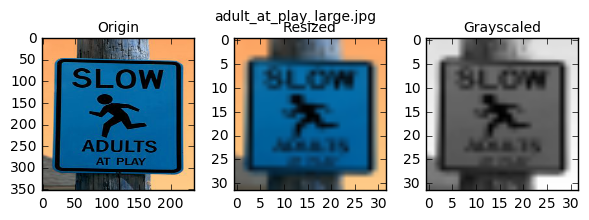

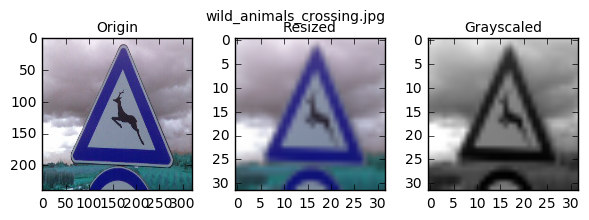

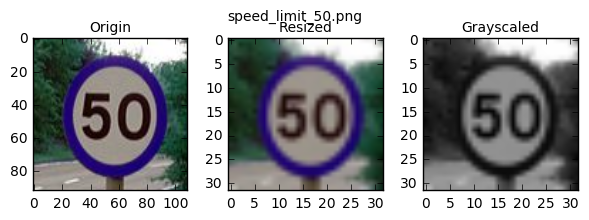

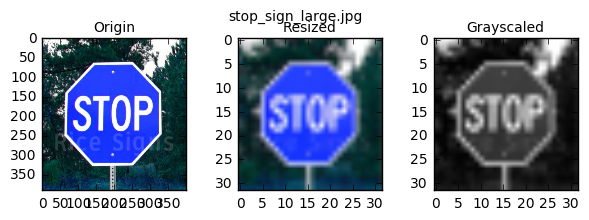

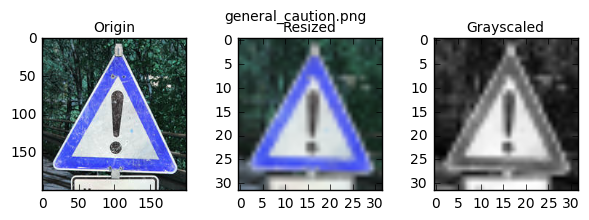

Predicating...
Model loaded
[[  5.27694965e-06   4.43761310e-05   3.17837817e-06   3.38910351e-14
    3.85431813e-05   1.00636643e-09   3.19530114e-15   3.58795639e-16
    6.78692074e-13   9.17757407e-13   1.48721952e-07   4.09633265e-12
    4.75919114e-06   6.46494511e-20   2.29852006e-18   5.91659793e-17
    2.77059080e-05   2.26321745e-29   2.30424415e-18   5.66524189e-11
    1.55186697e-10   3.19907849e-04   4.39993424e-15   1.65954465e-04
    3.08691319e-19   9.99202311e-01   2.32607688e-17   6.91241880e-20
    5.54087037e-19   1.05505345e-16   1.57717477e-06   1.30640629e-07
    7.18527266e-23   1.19262875e-19   1.40822444e-16   1.91153827e-19
    7.17445546e-15   3.49863530e-13   1.28863915e-08   6.11695232e-17
    1.86261910e-04   1.41906897e-16   1.08566238e-12]
 [  7.63311051e-19   5.77952138e-25   1.21145094e-29   7.18828644e-25
    1.47121425e-25   4.98515418e-30   1.04230303e-35   0.00000000e+00
    1.49717722e-34   1.32138354e-29   5.78588991e-27   2.60674373e-14
    1.33

In [10]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
        
image_files = ['adult_at_play_large.jpg', 
               'wild_animals_crossing.jpg', 
               'speed_limit_50.png', 
               'stop_sign_large.jpg', 
               'general_caution.png']

#feed_dict = {x: load_images(image_files), y: np.zeros([len(image_files)])}
feed_dict = {x: load_images(image_files)}
print("Predicating...")
probabilities = predicate('lenet.meta', feed_dict)
print(probabilities)


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** Fixed the load_images code. After load image files into narray correctly, the test results are pretty accurate - only the first image failed as it is not a valid sign. 

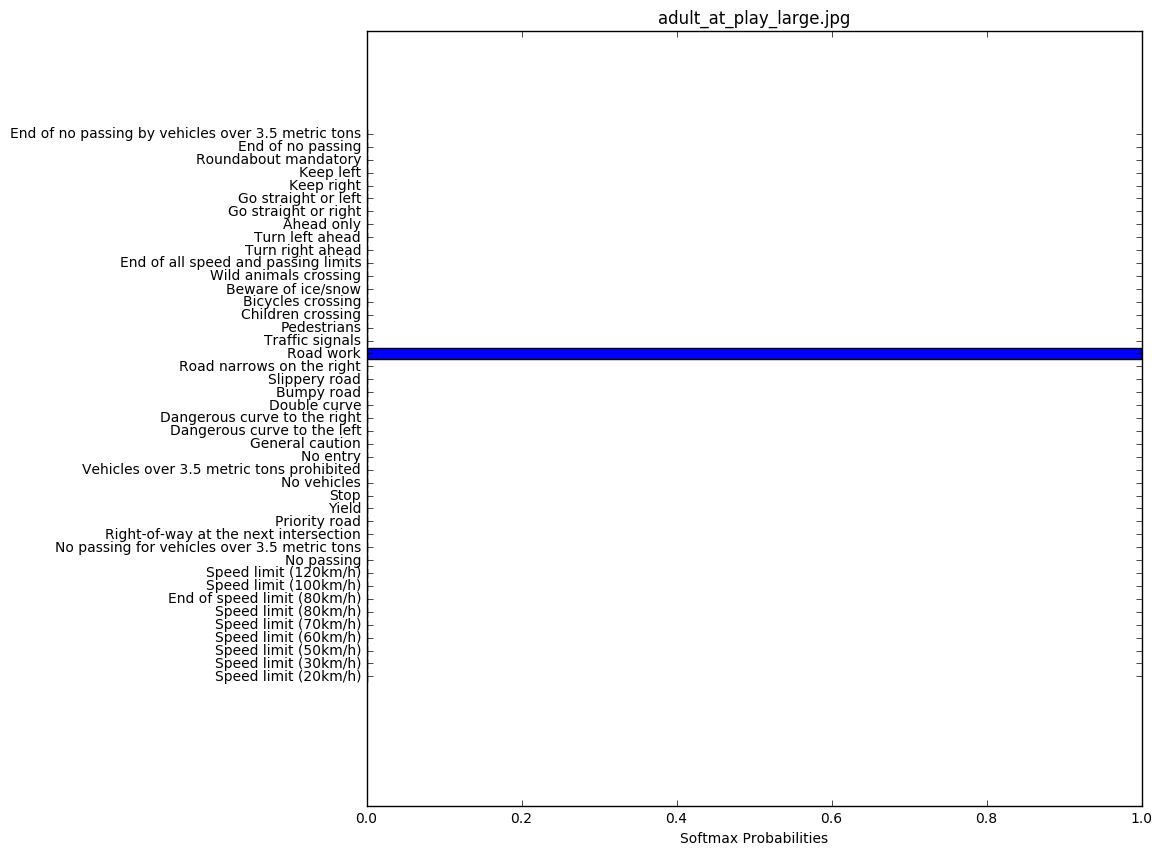

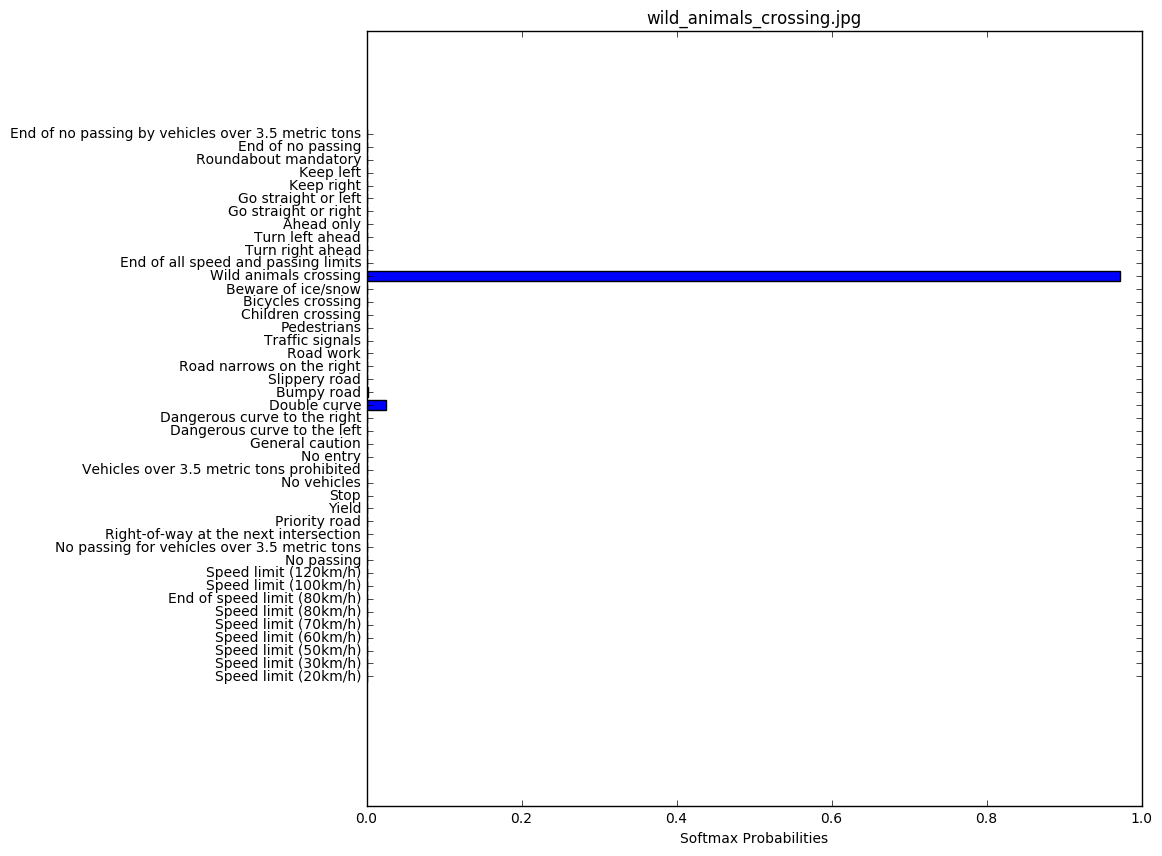

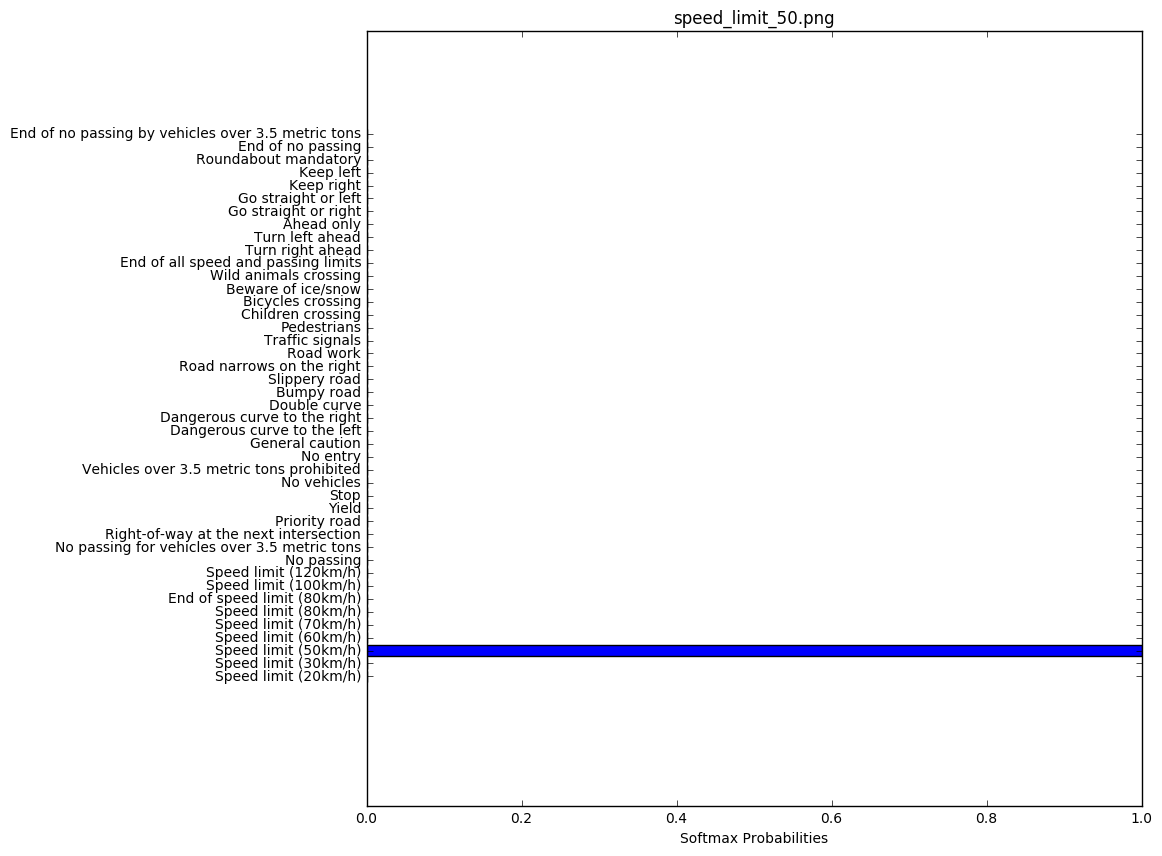

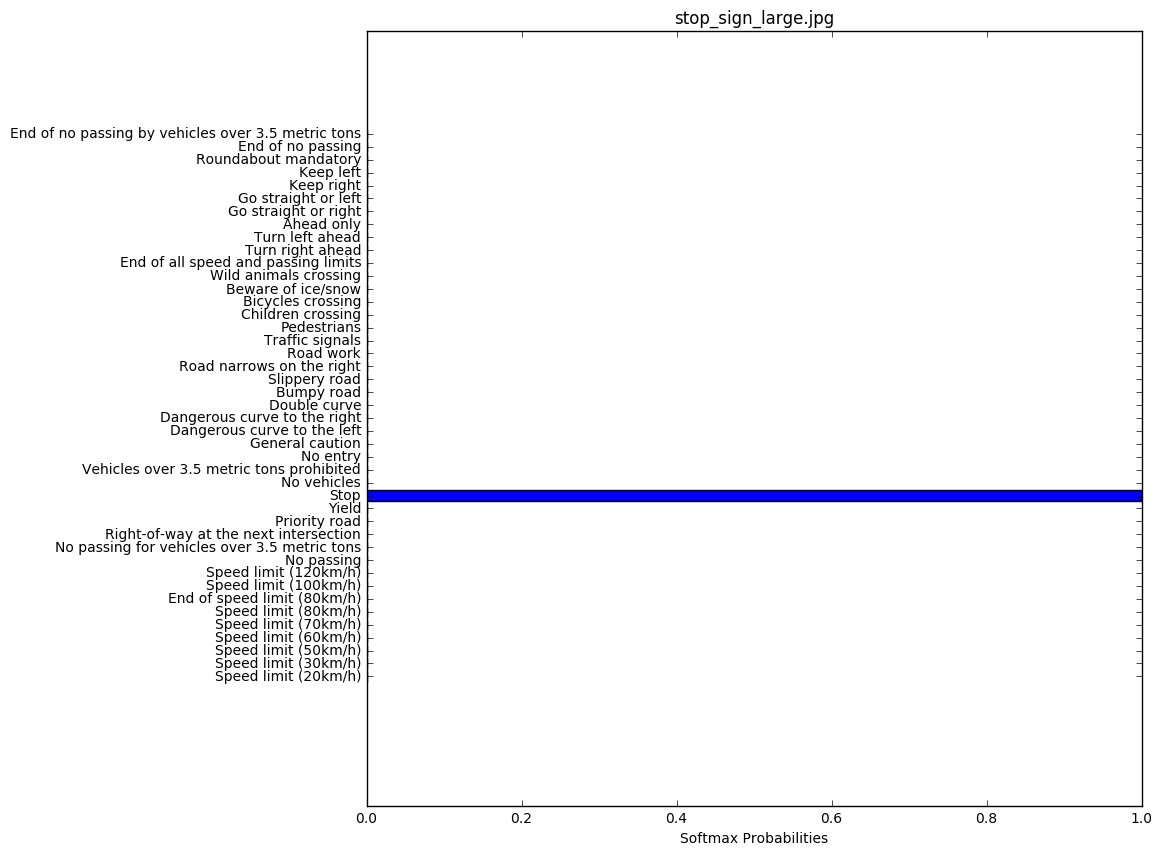

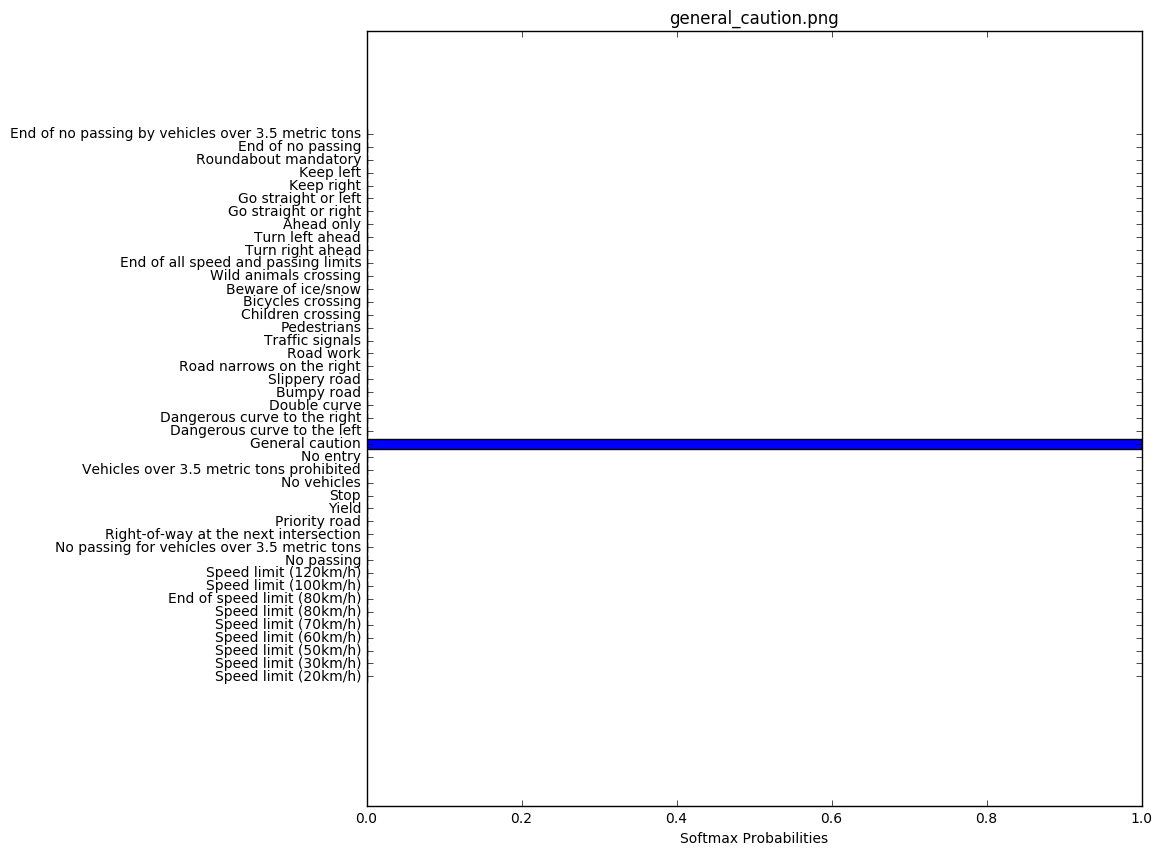

In [12]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
def plot_predication(file, scores):
    plt.figure(figsize=(10,10))
    y_pos = range(len(scores))
    plt.barh(y_pos, scores, align='center')
    plt.yticks(y_pos, signnames)
    plt.xlabel('Softmax Probabilities')
    plt.title(file)
    
for i, file in enumerate(image_files):
    convert_image(file)
    plot_predication(file, probabilities[i])


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** I visiualized the top k predications of sample test images below. It is way better than the above downloaded iamges. The accuracy is not as high as the validation accurary, but 88% is not bad. From the sample test images, I saw seems the model has a bit problem on recognizing very dark images. I think converting image to YUV then normalize only the Y channel might get better accuracy. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [13]:
X_test_gray = np.zeros([X_test.shape[0], X_test.shape[1], X_test.shape[2], 1])
for i, image in enumerate(X_test):
    X_test_gray[i] = grayscale(image)[...,None] # convert image shape from (32,32) to (32,32,1) for later

# use y_train_gray in later cells so that I can run the later cells repeatedly 
y_test_gray = np.copy(y_test)
    
X_test_norm = np.zeros([X_test.shape[0], X_test.shape[1], X_test.shape[2], 1])
for i, image in enumerate(X_test_gray):
    X_test_norm[i] = normalize(image)[...,None] # convert image shape from (32,32) to (32,32,1) for later

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    print("Model loaded")
    test_accuracy = evaluate(sess, X_test_gray, y_test_gray)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Model loaded
Test Accuracy = 0.880


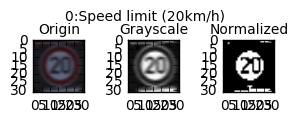

Model loaded


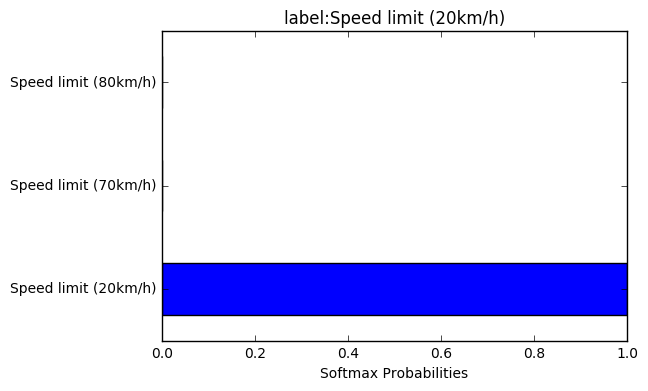

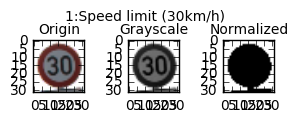

Model loaded


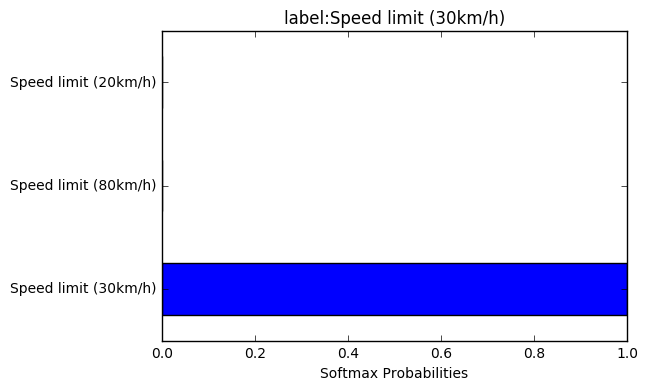

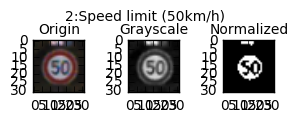

Model loaded


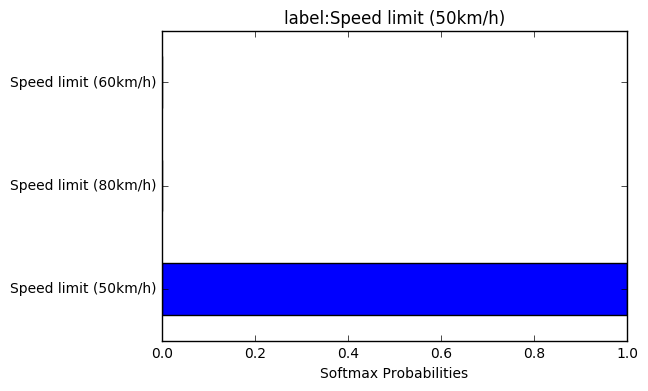

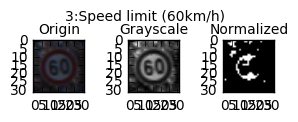

Model loaded


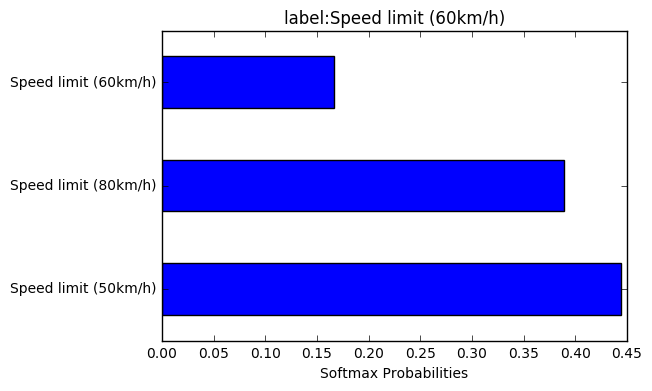

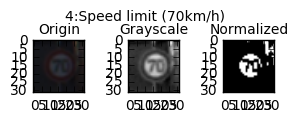

Model loaded


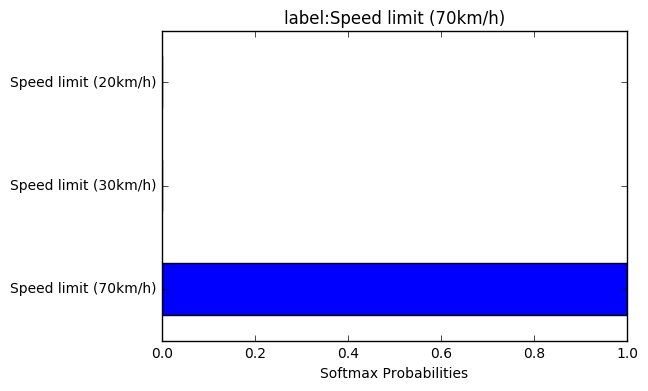

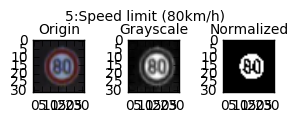

Model loaded


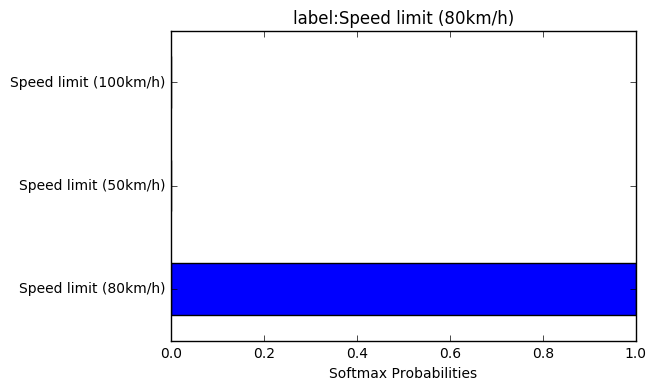

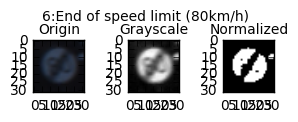

Model loaded


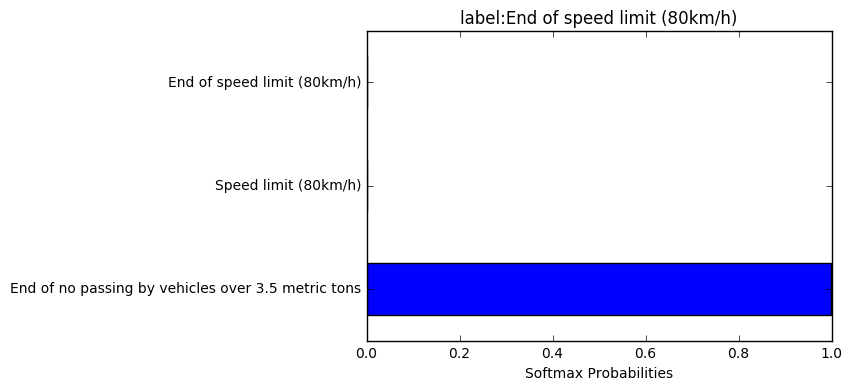

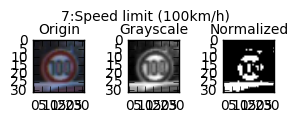

Model loaded


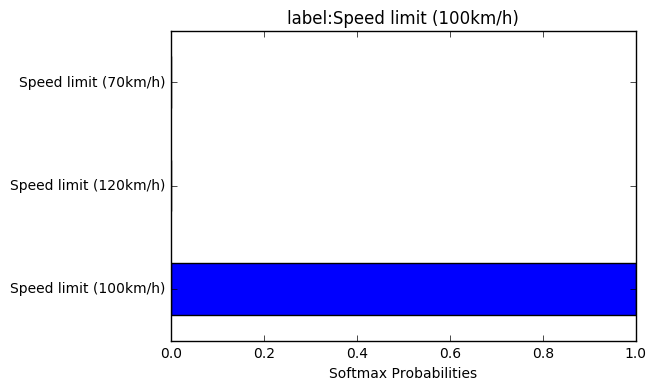

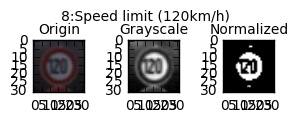

Model loaded


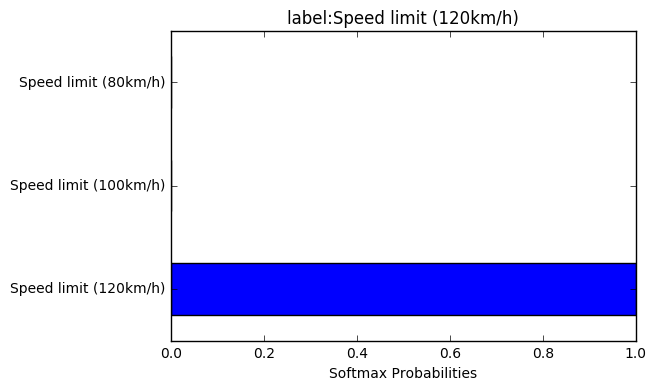

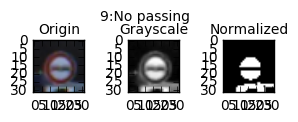

Model loaded


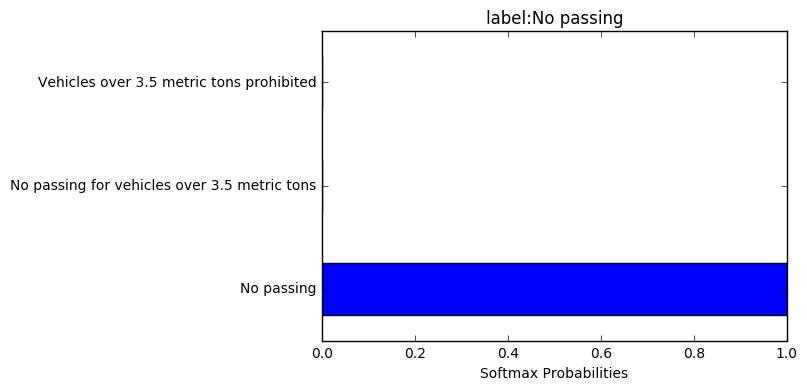

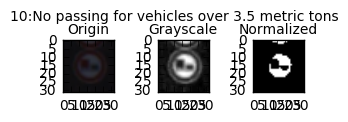

Model loaded


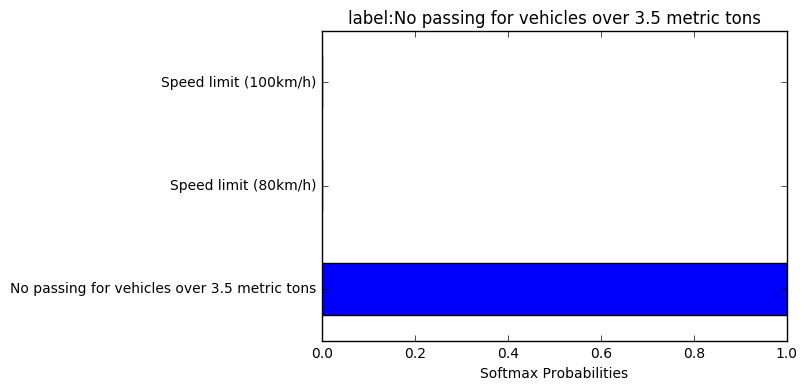

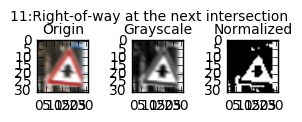

Model loaded


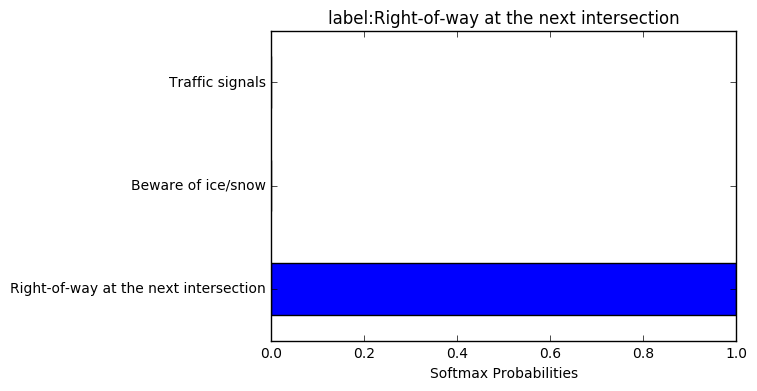

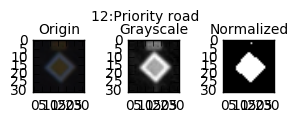

Model loaded


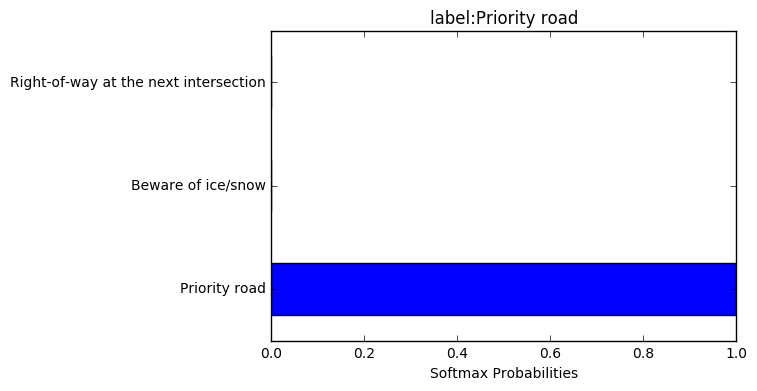

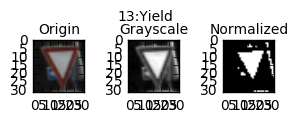

Model loaded


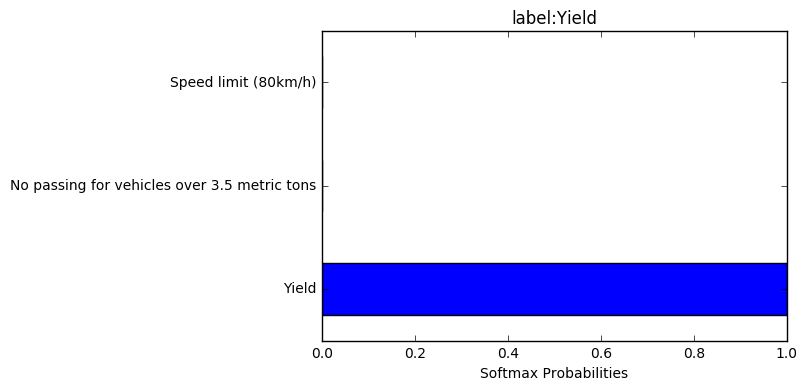

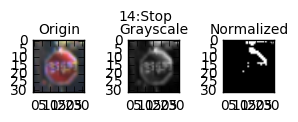

Model loaded


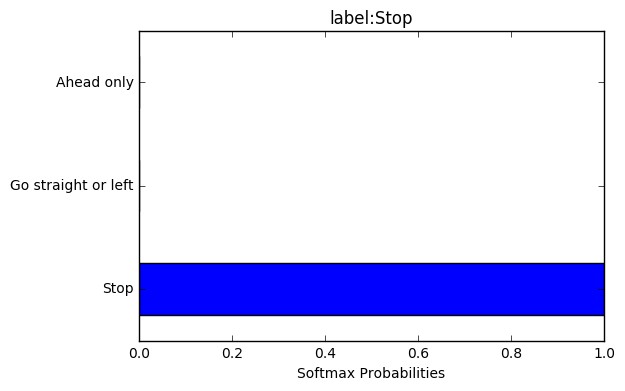

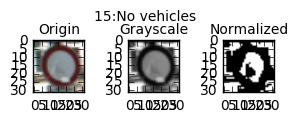

Model loaded


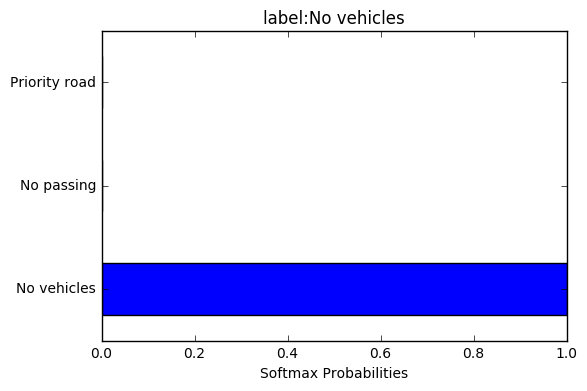

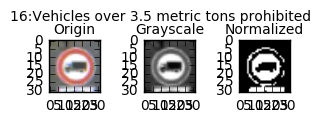

Model loaded


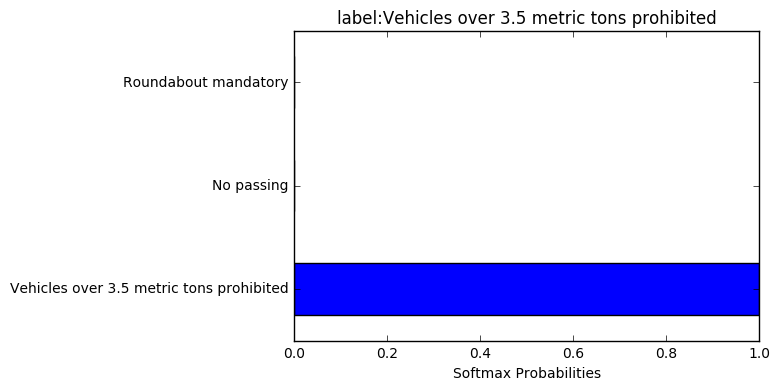

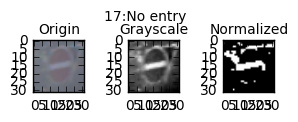

Model loaded


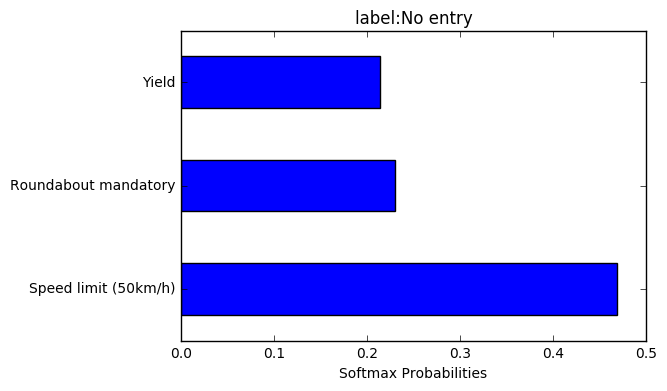

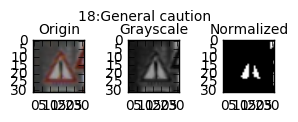

Model loaded


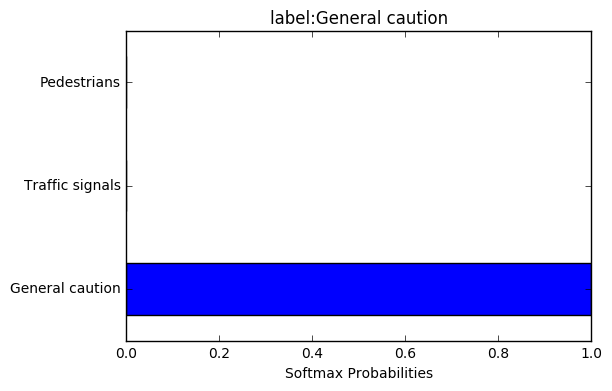

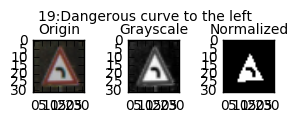

Model loaded


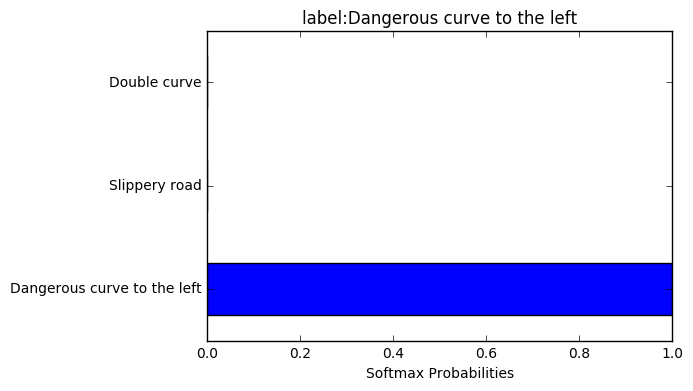

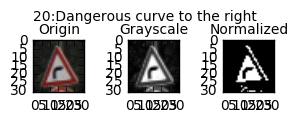

Model loaded


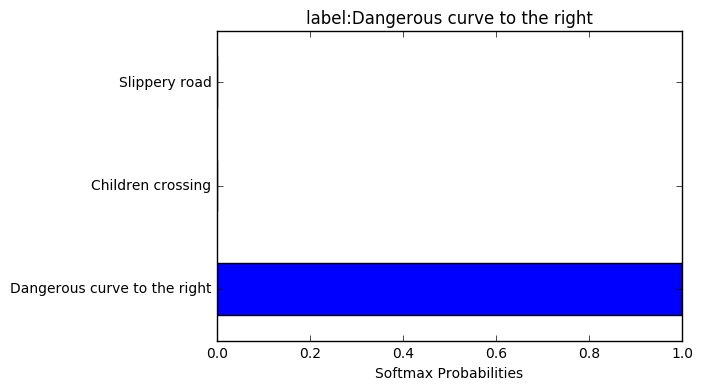

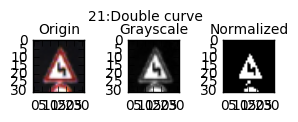

Model loaded


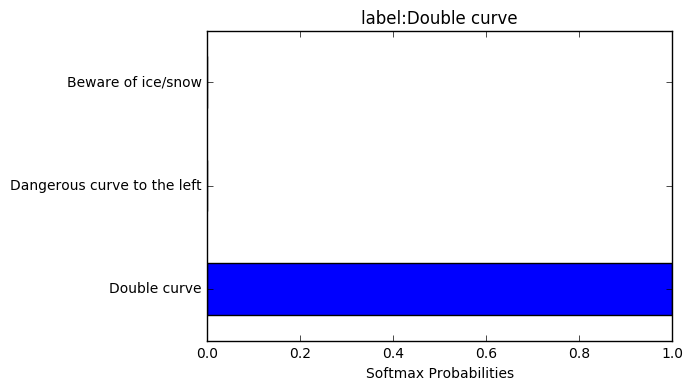

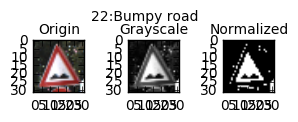

Model loaded


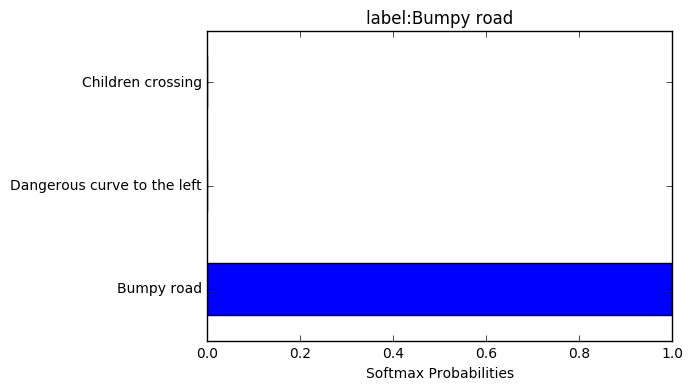

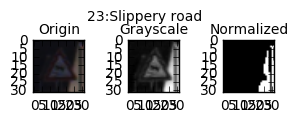

Model loaded


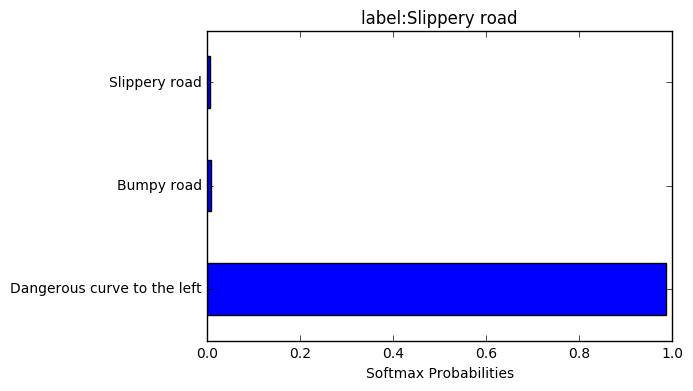

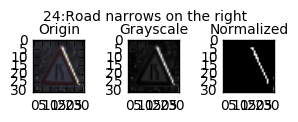

Model loaded


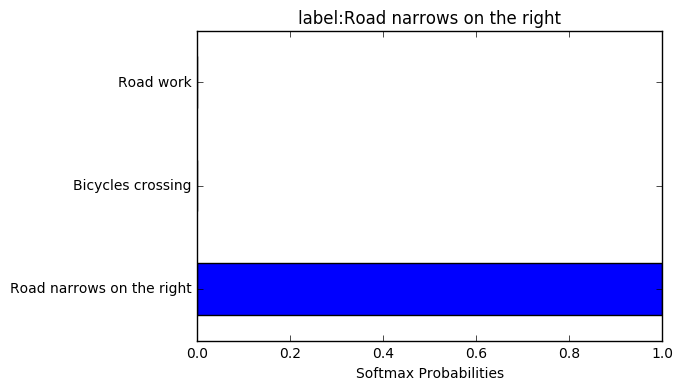

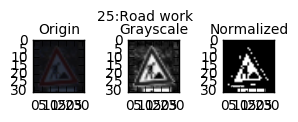

Model loaded


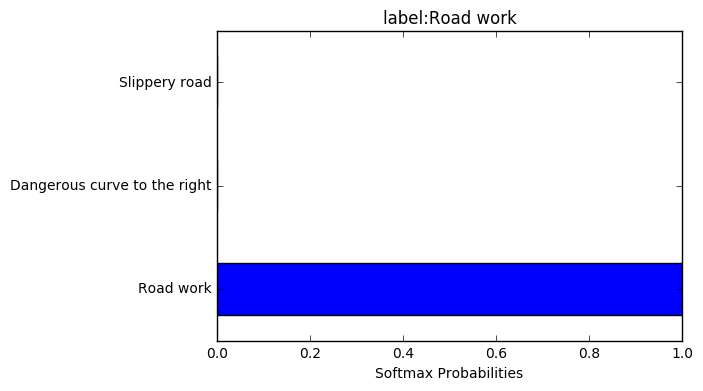

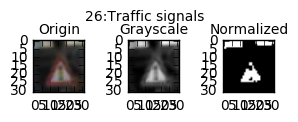

Model loaded


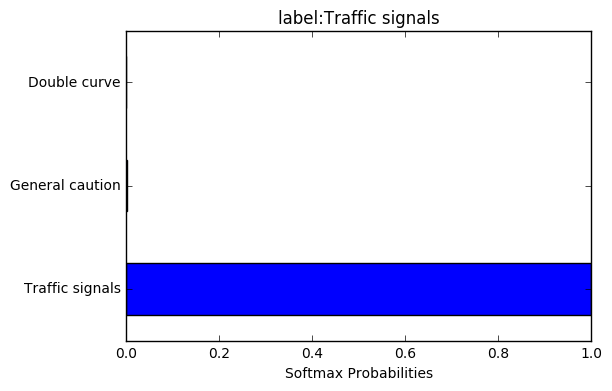

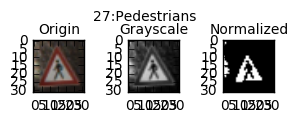

Model loaded


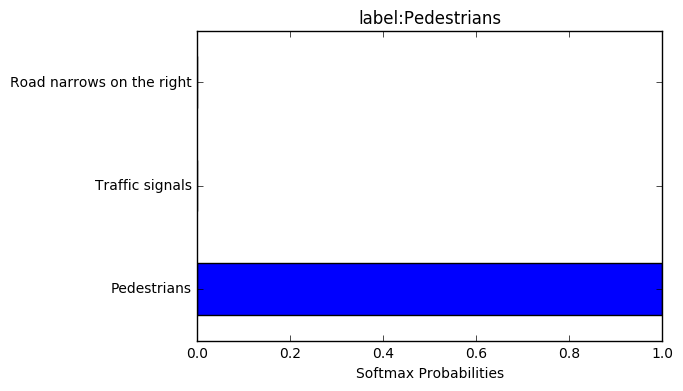

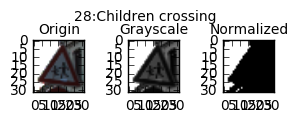

Model loaded


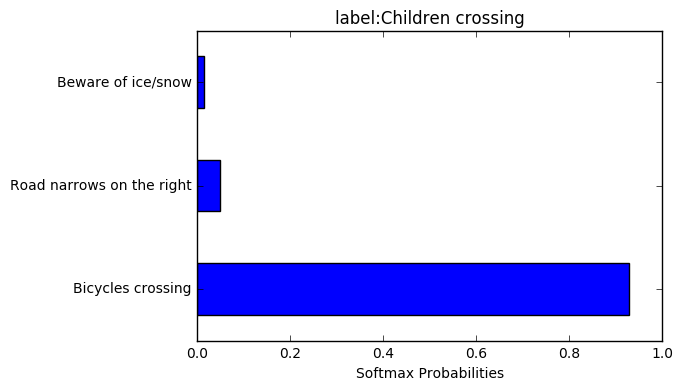

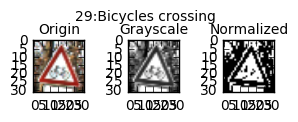

Model loaded


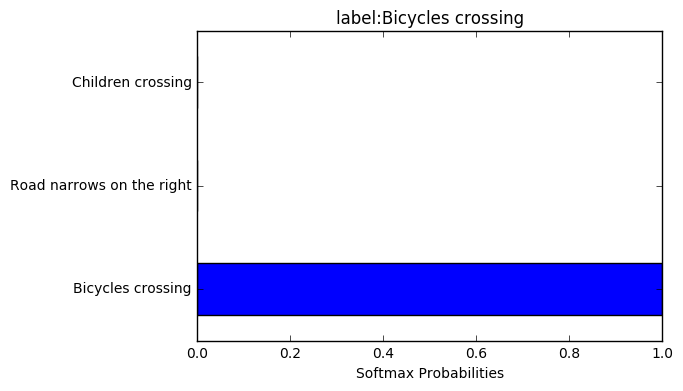

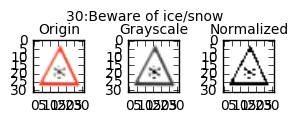

Model loaded


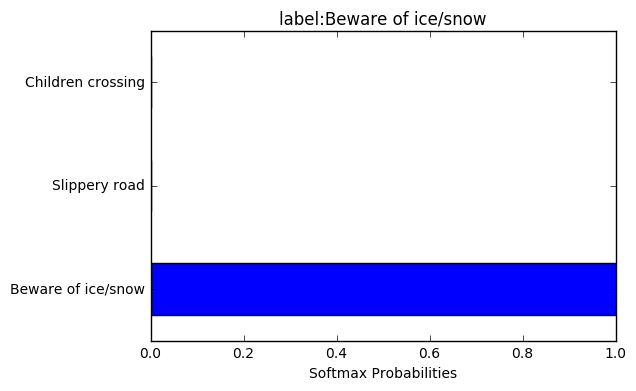

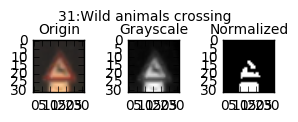

Model loaded


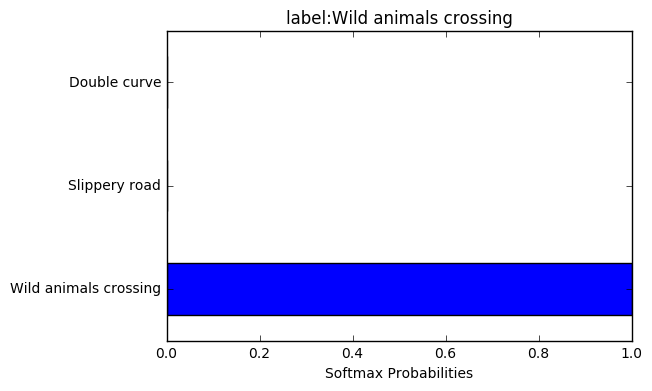

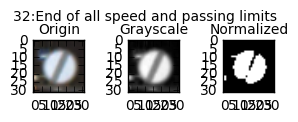

Model loaded


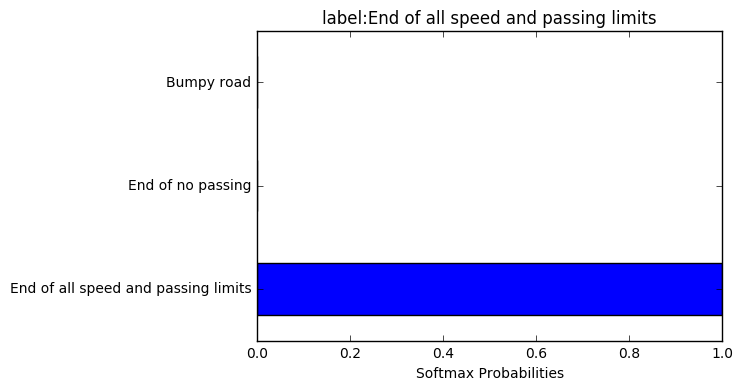

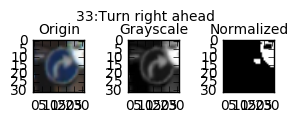

Model loaded


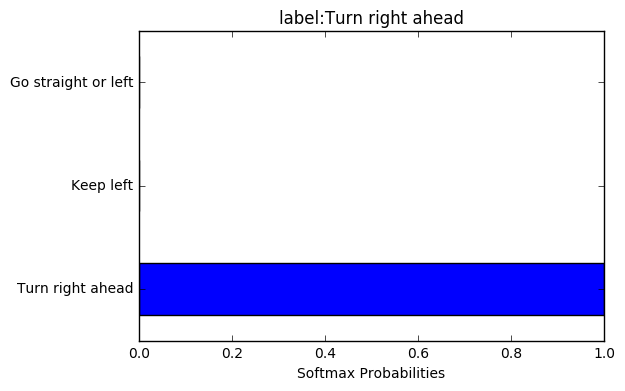

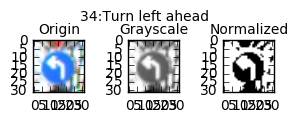

Model loaded


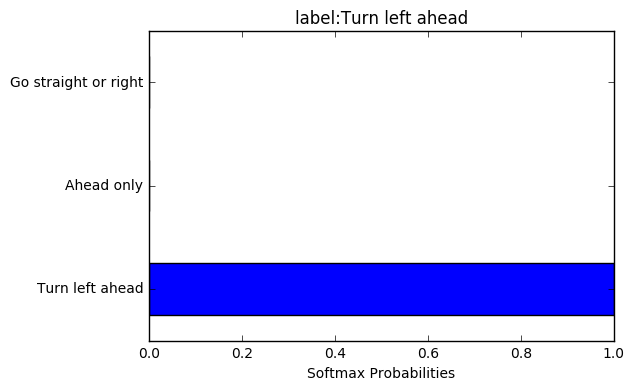

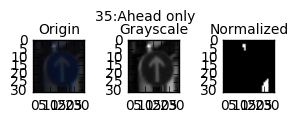

Model loaded


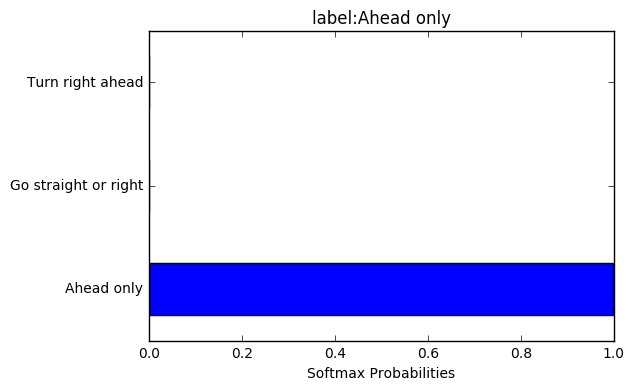

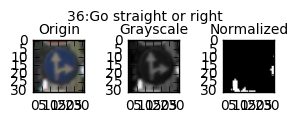

Model loaded


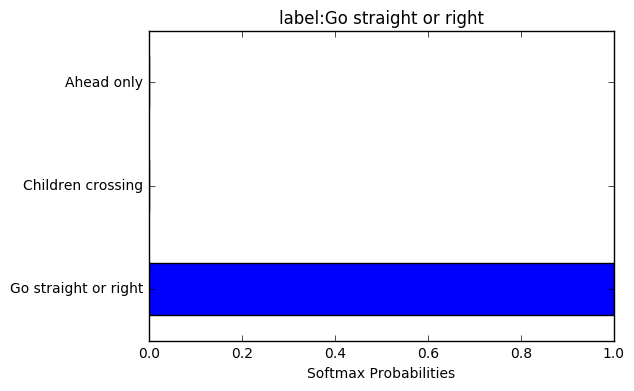

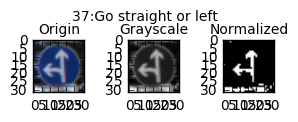

Model loaded


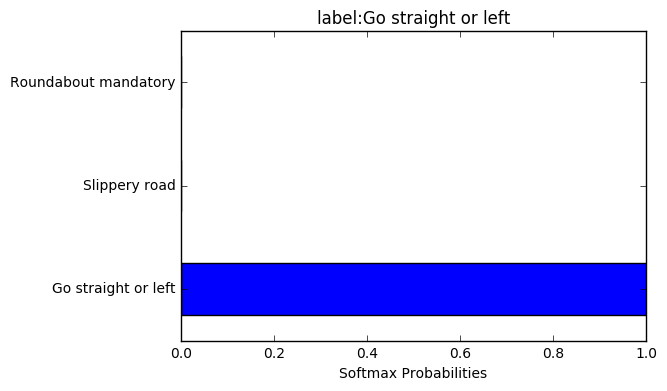

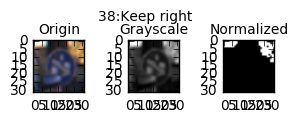

Model loaded


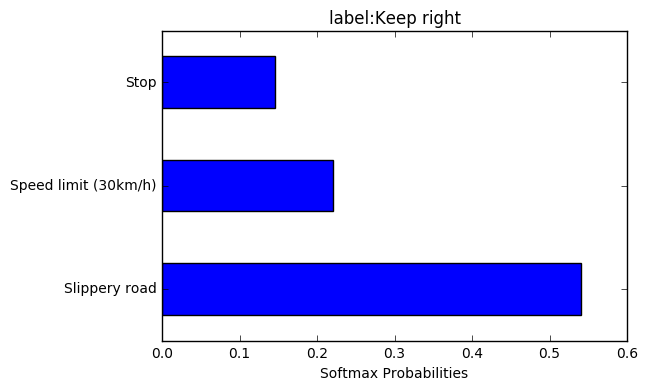

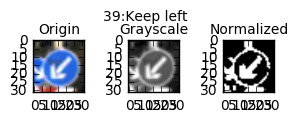

Model loaded


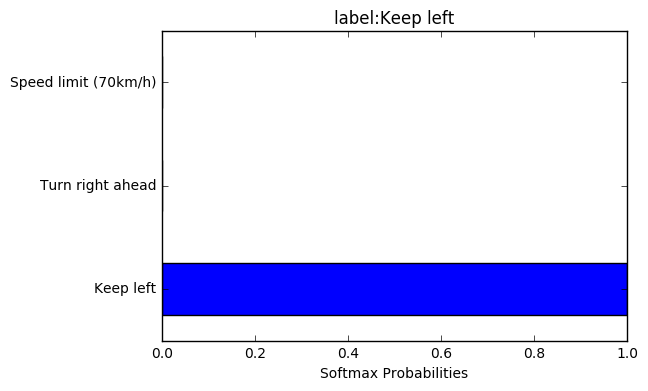

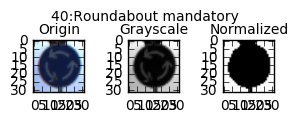

Model loaded


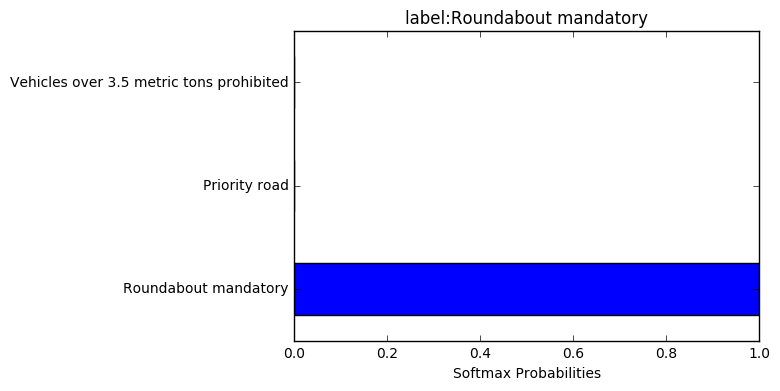

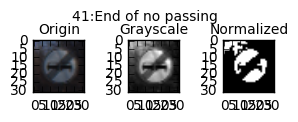

Model loaded


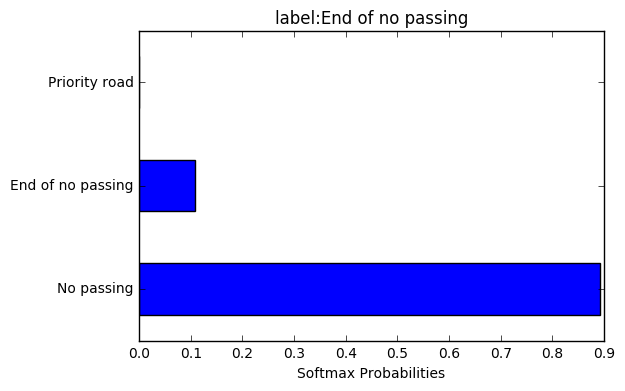

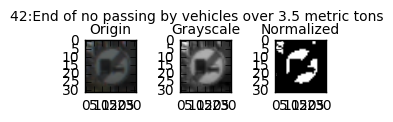

Model loaded


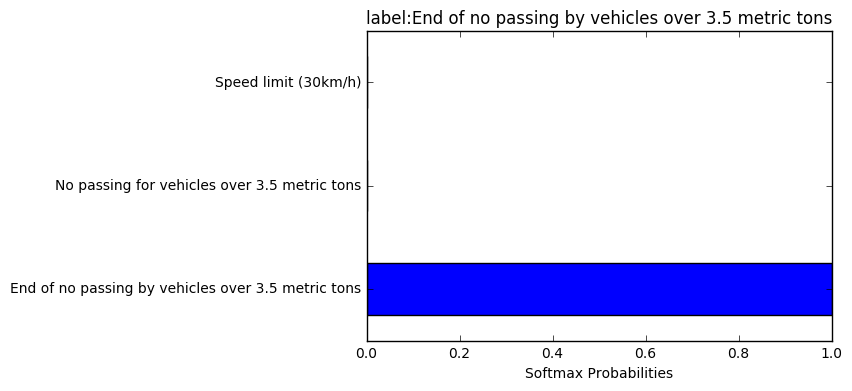

In [15]:
import pandas as pd

test_samples = random_pick(X_test, y_test)

def plot_top_predication(file, scores, indices):
    plt.title(file)
    plt.xlabel('Softmax Probabilities')
    s = pd.Series(scores,indices)
    s.plot(kind='barh')
    plt.show()

for sign_id, index in test_samples.items():
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(3, 1.2))
    fig.suptitle('{}:{}'.format(sign_id, signnames[sign_id]))
    ax1.set_title('Origin',fontsize=10)
    im1 = ax1.imshow(X_test[index].squeeze(), aspect='auto')
    ax2.set_title('Grayscale',fontsize=10)
    im2 = ax2.imshow(X_test_gray[index].squeeze(), aspect='auto', cmap='gray')
    ax3.set_title('Normalized',fontsize=10)
    im3 = ax3.imshow(X_test_norm[index].squeeze(), aspect='auto', cmap='gray')
    plt.tight_layout()
    plt.show()
    feature = np.array([X_test_gray[index]])
    label = y_test_gray[index]
    feed_dict = {x: feature, y: label}
    predication = predicate('lenet.meta', feed_dict)
    top_predication = predication[0].argsort()[-3:][::-1]
    plot_top_predication("label:{}".format(signnames[sign_id]),
                         [predication[0][i] for i in top_predication],
                         [signnames[i] for i in top_predication])
